In [1]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#importing and reading file
ads = pd.read_csv('Advertising.csv')
#Getting head of the file
ads.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#Getting file info
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
#ommiting or dropping the index column
ads = pd.read_csv('Advertising.csv', index_col=[0])
#Getting head of the file
ads.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
#Exploring data analysis

C:\Users\Plange-Kaye\AppData\Local\Temp\ipykernel_6256\1867614909.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ads.sales)


<Axes: xlabel='sales', ylabel='Density'>

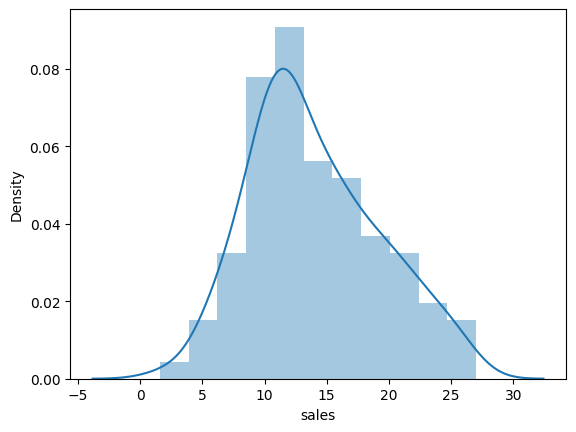

In [6]:
import seaborn as sns
sns.distplot(ads.sales)

C:\Users\Plange-Kaye\AppData\Local\Temp\ipykernel_6256\2381279130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ads.newspaper)


<Axes: xlabel='newspaper', ylabel='Density'>

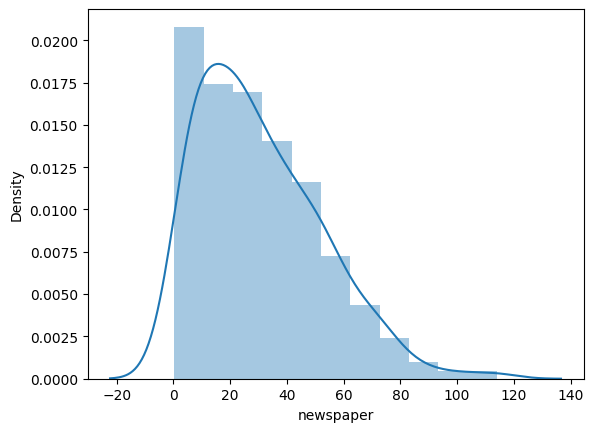

In [7]:
sns.distplot(ads.newspaper)

C:\Users\Plange-Kaye\AppData\Local\Temp\ipykernel_6256\2608337108.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ads.radio)


<Axes: xlabel='radio', ylabel='Density'>

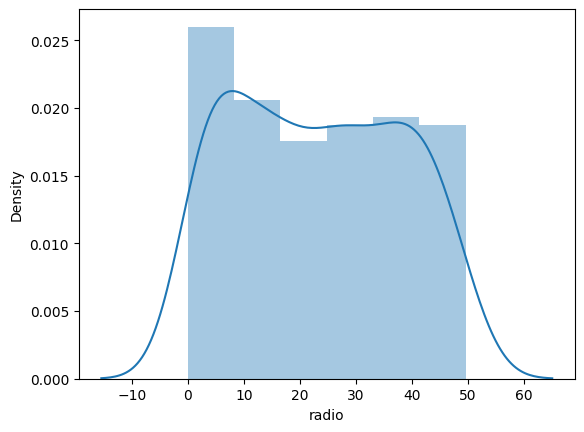

In [8]:
sns.distplot(ads.radio)

C:\Users\Plange-Kaye\AppData\Local\Temp\ipykernel_6256\541199322.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ads.TV)


<Axes: xlabel='TV', ylabel='Density'>

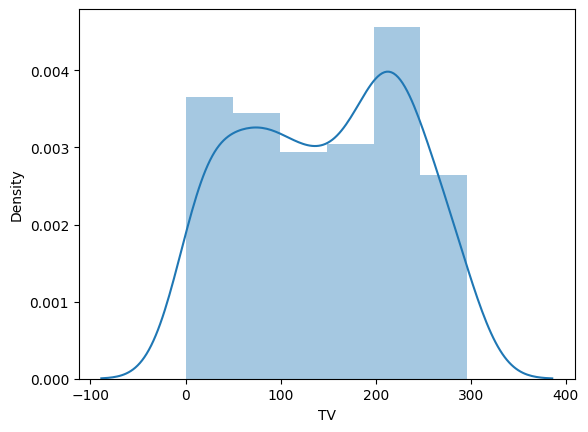

In [9]:
sns.distplot(ads.TV)

In [10]:
#Exploring Relationships Between Predictors And Response

C:\Users\Plange-Kaye\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


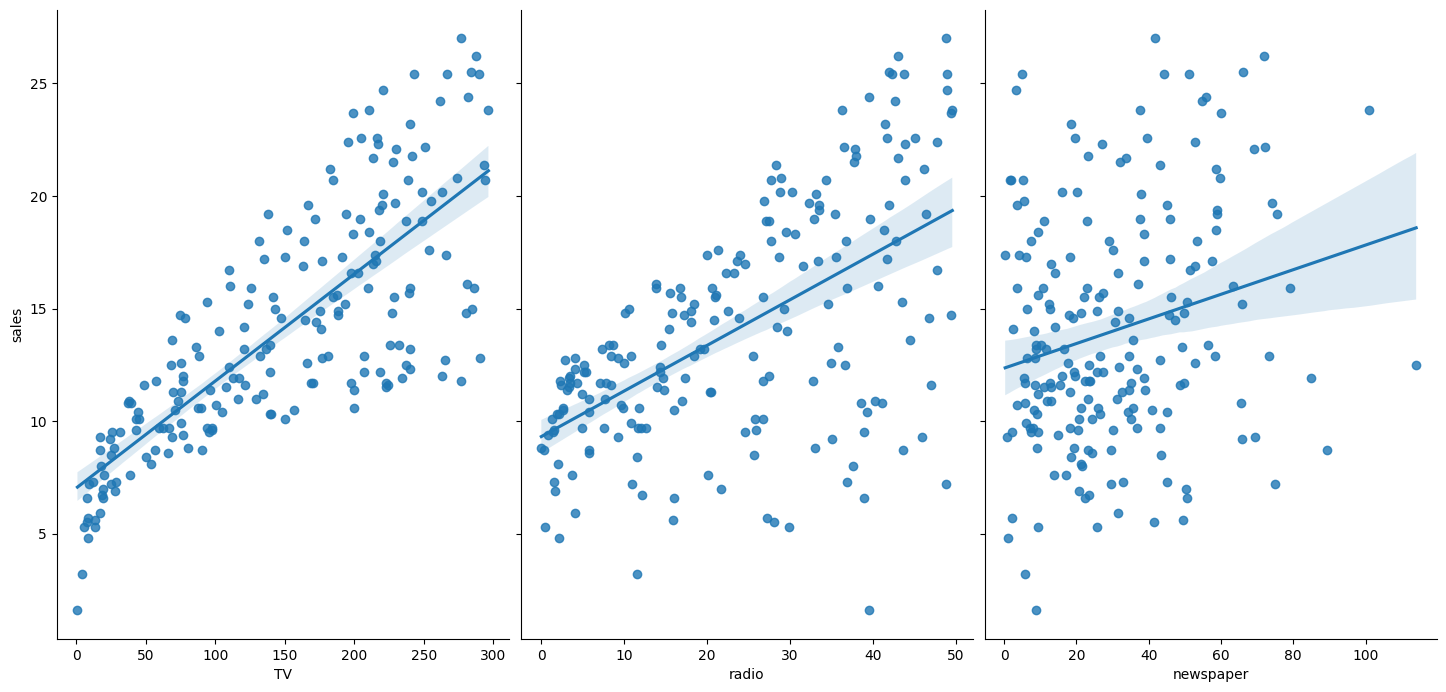

In [11]:
sns.pairplot(ads,x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7,
            aspect=0.7,kind='reg')

In [12]:
#correlation value of spending on TV and sales
ads.TV.corr(ads.sales)

0.7822244248616066

In [13]:
#correlation value of all columns
ads.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

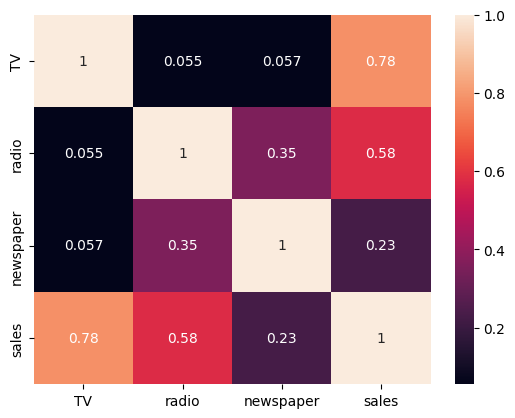

In [14]:
#Heat map of the correlation metrics
sns.heatmap(ads.corr(), annot=True)

In [15]:
#Creating a simple linear regression model

In [16]:
x= ads[['TV']]
x.head()

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8


In [17]:
#checking the type and shape
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [18]:
#checking the type and shape
y= ads.sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [20]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)


In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [23]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [24]:
#Interpreting the model co-efficients

In [25]:
print(linreg.intercept_)
print(linreg.coef_)

6.9119726188687185
[0.04802945]


In [26]:
#Predicting the model

In [27]:
y_pred= linreg.predict(X_test)
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

In [28]:
#Making a model evaluation metrics

In [29]:
true = [100, 50, 30, 20]
pred = [90,  50, 50, 30]

In [30]:
#Using the Mean Absolute Error for evaluation
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))


10.0


In [31]:
#Using the Mean Squared Error for evaluation
print(metrics.mean_squared_error(true, pred))

150.0


In [32]:
#Using the Root Mean Squared Error for evaluation
print(np.sqrt(metrics.mean_squared_error(true, pred)))


12.24744871391589


In [33]:
#Predicting the RMSE for sales prediction
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.210929707703542
